In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("tested.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
df.shape

(418, 12)

In [5]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.drop("Cabin", axis=1, inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.drop_duplicates(subset='Name', inplace=True)
df.shape

(331, 11)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Pclass       331 non-null    int64  
 3   Name         331 non-null    object 
 4   Sex          331 non-null    object 
 5   Age          331 non-null    float64
 6   SibSp        331 non-null    int64  
 7   Parch        331 non-null    int64  
 8   Ticket       331 non-null    object 
 9   Fare         331 non-null    float64
 10  Embarked     331 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 31.0+ KB


C:\Users\sassi\AppData\Local\Temp\ipykernel_13300\3332846147.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


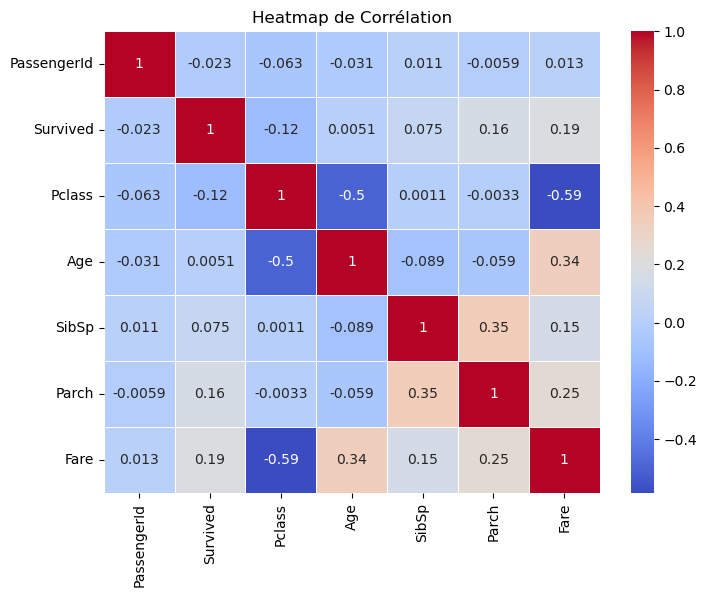

In [12]:
# Calculez la matrice de corrélation
correlation_matrix = df.corr()
# Créez un heatmap à partir de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Corrélation')
plt.show()

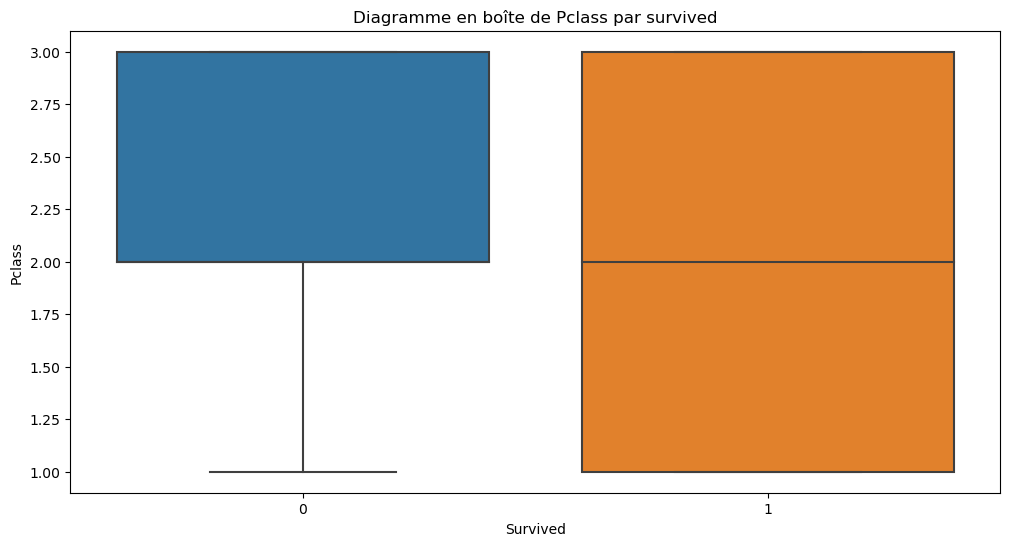

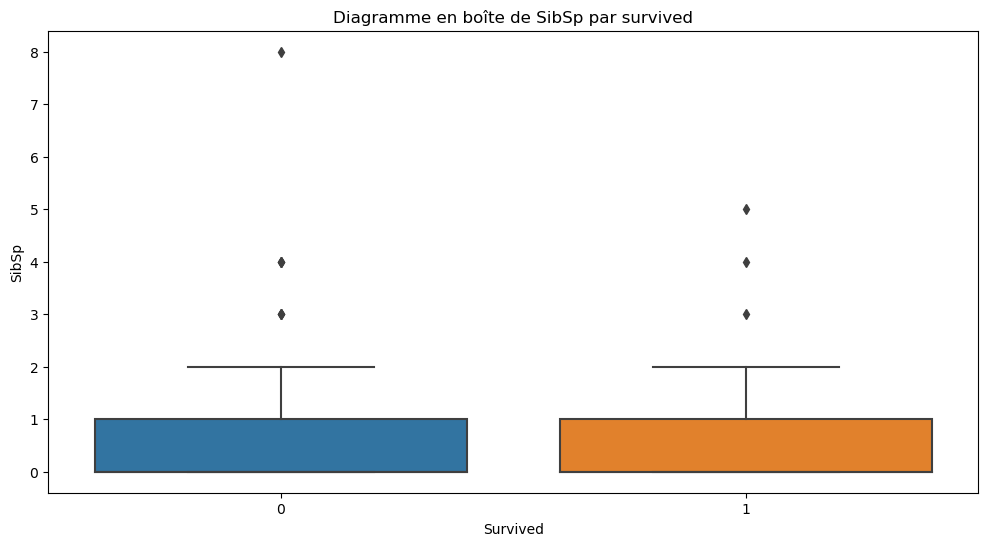

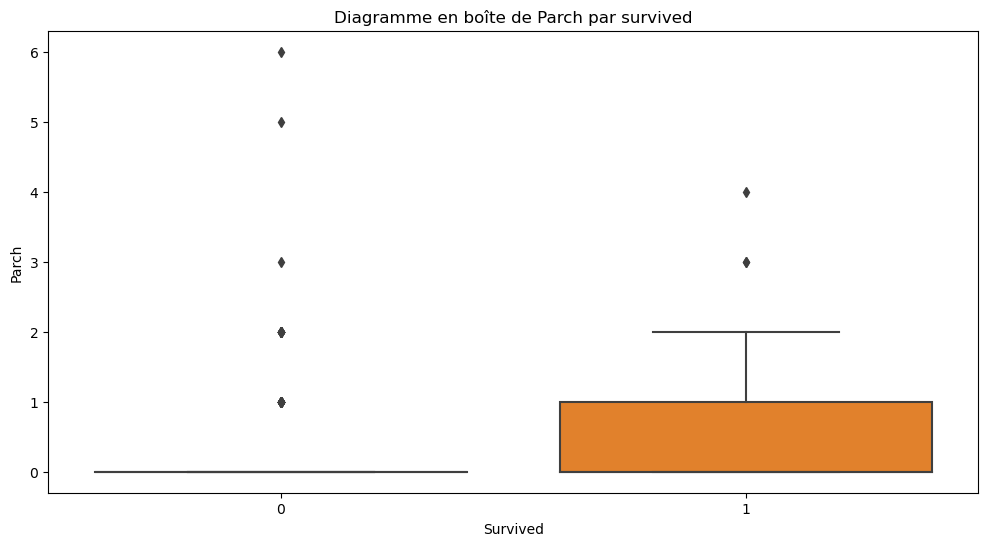

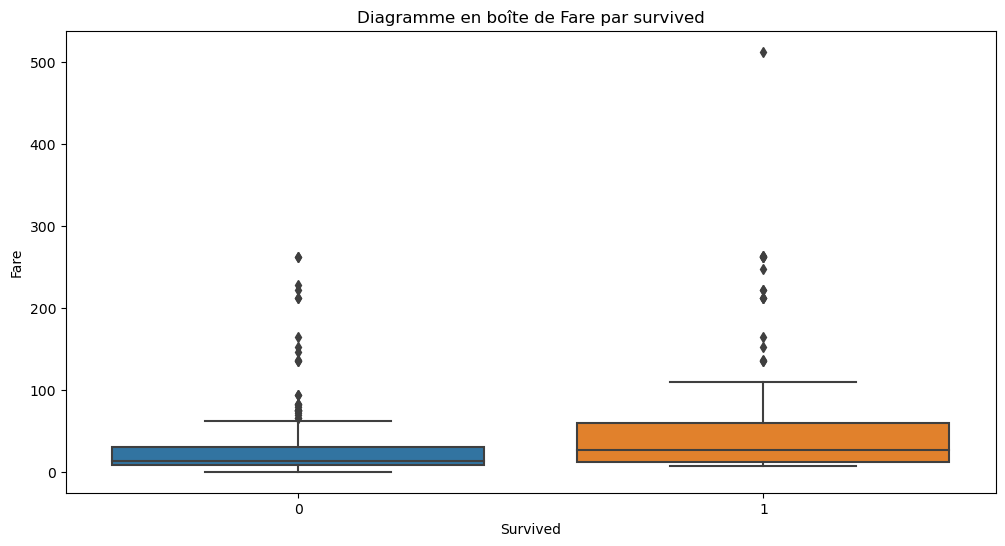

In [13]:
# Liste des variables numériques à visualiser
numeric_vars = ['Pclass', 'SibSp', 'Parch', 'Fare']

# Boucle pour créer des boîtes pour chaque variable en fonction de l'espèce
for var in numeric_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Survived', y=var)
    plt.title(f'Diagramme en boîte de {var} par survived')
    plt.show()

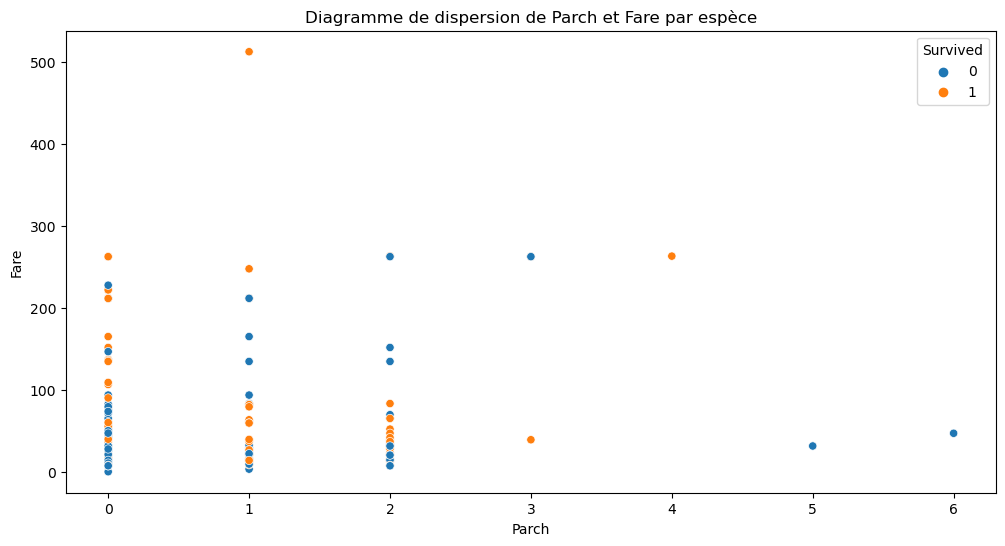

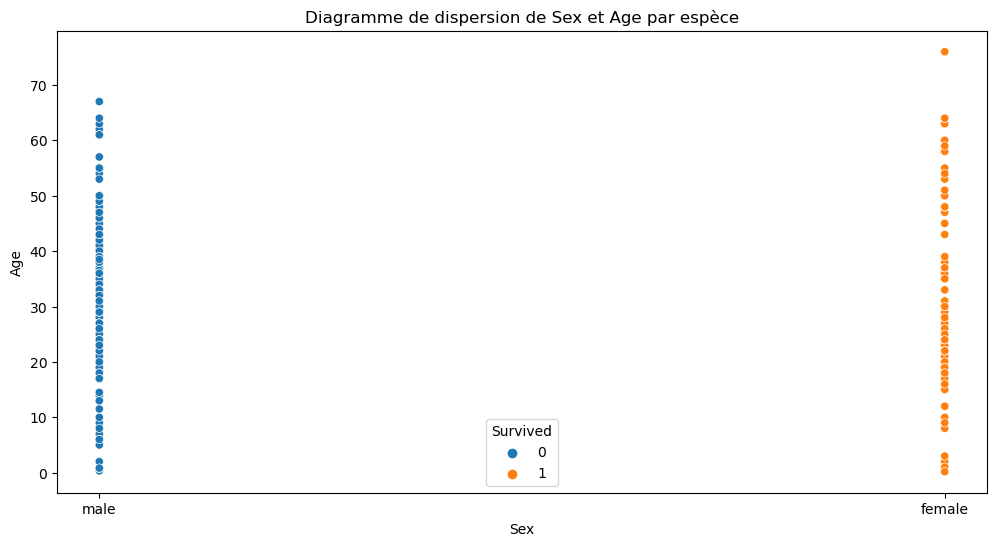

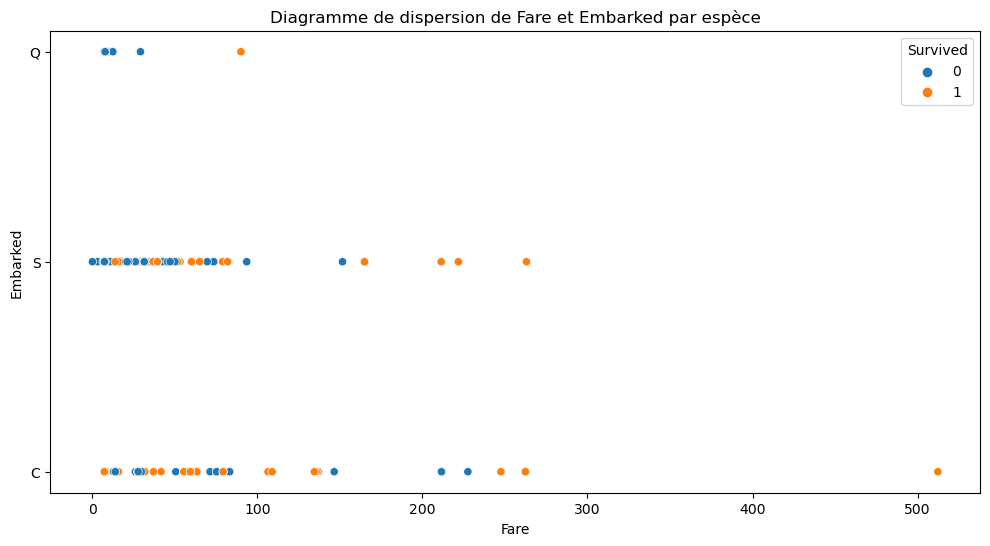

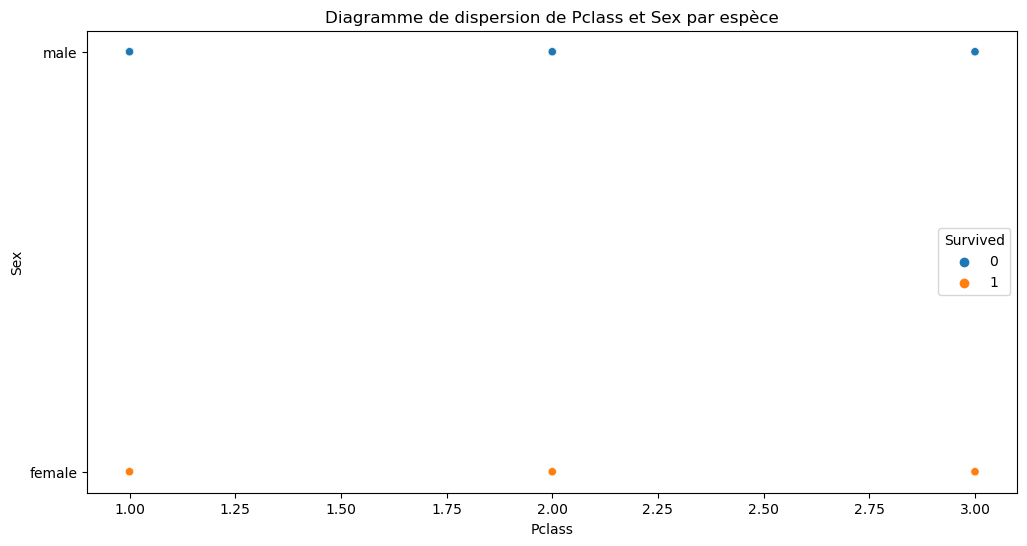

In [14]:
# Liste des paires de variables pour créer des diagrammes de dispersion
var_pairs = [('Parch', 'Fare'),
             ('Sex','Age'),
             ('Fare','Embarked'),
            ('Pclass','Sex')]

# Boucle pour créer des diagrammes de dispersion pour chaque paire de variables en fonction de l'espèce
for var_pair in var_pairs:
    x_var, y_var = var_pair
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=x_var, y=y_var, hue='Survived')
    plt.title(f'Diagramme de dispersion de {x_var} et {y_var} par espèce')
    plt.show()

In [15]:
df.drop(columns=['PassengerId','Ticket','Name'], inplace=True)

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
409,1,3,female,3.0,1,1,13.7750,S
411,1,1,female,37.0,1,0,90.0000,Q
412,1,3,female,28.0,0,0,7.7750,S
414,1,1,female,39.0,0,0,108.9000,C


In [19]:
from sklearn.preprocessing import LabelEncoder
# Créer un objet LabelEncoder
label_encoder = LabelEncoder()

# Appliquer l'encodage à la colonne 'species'
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
409,1,3,0,3.0,1,1,13.7750,2
411,1,1,0,37.0,1,0,90.0000,1
412,1,3,0,28.0,0,0,7.7750,2
414,1,1,0,39.0,0,0,108.9000,0


In [22]:
x=df.drop("Survived",axis=1)

In [23]:
y=df["Survived"]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [26]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = DT.predict(x_test)
# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        28

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
[[39  0]
 [ 0 28]]


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Création du modèle KNN pour la classification (avec k=5 voisins)
KN = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle
KN.fit(x_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = KN.predict(x_test)
# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.6716417910447762
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        39
           1       0.64      0.50      0.56        28

    accuracy                           0.67        67
   macro avg       0.66      0.65      0.65        67
weighted avg       0.67      0.67      0.66        67

Confusion Matrix:
[[31  8]
 [14 14]]


In [30]:
from sklearn.linear_model import LogisticRegression
# Création du modèle de régression logistique pour la classification
lr= LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle
lr.fit(x_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = lr.predict(x_test)
# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        28

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
[[39  0]
 [ 0 28]]


In [31]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
# Entraînement du modèle
RFC.fit(x_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = RFC.predict(x_test)
# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        28

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
[[39  0]
 [ 0 28]]
